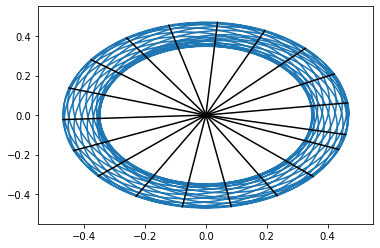

[0.0, 0.0002, 0.0004, 0.0008, 0.0016, 0.0032] [0.5103555441887717, 2.40958880143308, 3.813989961077935, 7.807287052245239, 14.376714252903957, 27.81399669611352]
8169.891350127872


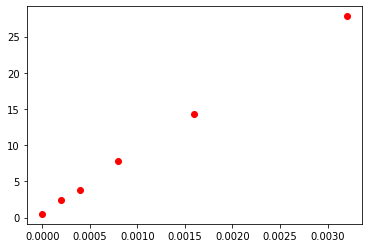

In [14]:
from pylab import *
import matplotlib as mpl
from math import sqrt, pi
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
import matplotlib.pyplot as plt


class Mecury():

    def __init__(self, initx=0.47, inity=0, initvx=0, initvy=8.2, dt=0.001, powerlaw=2., alpha=0.008, outputfile=''):
        self.dt=dt
        self.beta=powerlaw
        self.alpha=alpha
        self.filename=outputfile
        self.calculate(sqrt(initx*initx+inity*inity), initx, inity, initvx, initvy, 0.)
        self.dth=0.

    def stepOne(self, r, x, y, vx, vy, t):
        r=sqrt(x*x+y*y) 
        vx=vx-(4*pi*pi*x*self.dt)/r**(self.beta+1)/(1+self.alpha/r**(self.beta))
        vy=vy-(4*pi*pi*y*self.dt)/r**(self.beta+1)/(1+self.alpha/r**(self.beta))
        x=x+vx*self.dt
        y=y+vy*self.dt
        t=t+self.dt
        return r, x, y, vx, vy, t

    def calculate(self, r, x ,y ,vx, vy, t):
        self.data=[(r, x,y,vx,vy,t)]
        while t<100:
            r, x, y, vx, vy, t=self.stepOne(r, x ,y ,vx, vy, t)
            self.data.append((r, x,y,vx,vy,t))
        if self.filename!='':
            self.store()



    def store(self):
        pass

    def plotMecury(self, figType=1):
        x=[]; y=[]; z=[0.]; vx=[]; vy=[]; t=[]; r=[]; xp=[]; yp=[]; k=[]
        for i in range(5000):
            (r1, x1, y1, vx1, vy1, t1)=self.data[i]
            x.append(x1); y.append(y1); vx.append(vx1); vy.append(vy1)
            t.append(t1); z.append(0.); r.append(r1)
            if i>2:
                dr1=r[i-1]-r[i-2]
                dr2=r[i]-r[i-1]
                if dr1>0 and dr2<0:
                    xp.append(x[i-1])
                    yp.append(y[i-1])
            m=len(self.data)
        if figType==1:
            plot(x,y)
            plot(0,0,'r*')
            for j in range(len(xp)):
                plot([0,xp[j]], [0,yp[j]],'k-')
            xlim(-0.55,0.55)
            ylim(-0.55,0.55)
            show()
        else:
            fig=plt.figure()
            ax=Axes3D(fig)
            ax.plot(x[0:m], y[0:m], z[0:m], label='Kepler')
            ax.legend()
            plt.show()
            
    def plotPrecessionrate(self, figType=1):
        x=[]; y=[]; z=[0.]; vx=[]; vy=[]; t=[]; r=[]; xp=[]; yp=[]; tp=[]; k=[];
        theta=[]; th=0.; dth=0.#dth=[]
        for i in range(3000):
            (r1, x1, y1, vx1, vy1, t1)=self.data[i]
            x.append(x1); y.append(y1); vx.append(vx1); vy.append(vy1)
            t.append(t1); z.append(0.); r.append(r1)
            if i>2:
                dr1=r[i-1]-r[i-2]
                dr2=r[i]-r[i-1]
                if dr1>0 and dr2<0:
                    xp.append(x[i-1])
                    yp.append(y[i-1])
                    tp.append(t[i-1]-0.24500000000000019)
            m=len(self.data)
            n=len(xp)
        if figType==1:
            for j in range(n):
                k.append(yp[j]/xp[j])
                theta.append((180/pi)*(arctan((k[0]-k[j])/(1+k[0]*k[j]))))
            for l in range(n-1):
                th=th+theta[l+1]/tp[l+1]
            dth=th/n
            print (theta)
            print (tp)
            print (dth)

            
                
            #print th
            #print theta[0]/tp[0]
            plot(tp,theta)
            #plot(0,0,'r*')
            xlim(0,3)
            ylim(0,20)
            show()
            
        else:
            fig=plt.figure()
            ax=Axes3D(fig)
            ax.plot(x[0:m], y[0:m], z[0:m], label='Kepler')
            ax.legend()
            plt.show()
        #return dth
    


    def calculatedth(self, figType=1):
        x=[]; y=[]; z=[0.]; vx=[]; vy=[]; t=[]; r=[]; xp=[]; yp=[]; tp=[]; k=[];
        theta=[]; th=0.; dth=0.#dth=[]
        for i in range(3000):
            (r1, x1, y1, vx1, vy1, t1)=self.data[i]
            x.append(x1); y.append(y1); vx.append(vx1); vy.append(vy1)
            t.append(t1); z.append(0.); r.append(r1)
            if i>2:
                dr1=r[i-1]-r[i-2]
                dr2=r[i]-r[i-1]
                if dr1>0 and dr2<0:
                    xp.append(x[i-1])
                    yp.append(y[i-1])
                    tp.append(t[i-1]-0.24500000000000019)
            m=len(self.data)
            n=len(xp)
        if figType==1:
            for j in range(n):
                k.append(yp[j]/xp[j])
                theta.append((180/pi)*(arctan((k[0]-k[j])/(1+k[0]*k[j]))))
            for l in range(n-1):
                th=th+theta[l+1]/tp[l+1]
            self.dth=th/n

def calculaterate():
    listalpha=[]
    listdth=[]
    list1=[0,1,2,4,8,16]
    rate=0.
    for k in range(6):
        list1[k]=0.0002*list1[k]
        c=Mecury(alpha=list1[k])
        c.calculatedth()
        listalpha.append(c.alpha)
        #print c.alpha
        listdth.append(c.dth)
        #print c.dth
    print (listalpha,listdth)    
    plot(listalpha, listdth, 'ro')
    for m in range(5):
        rate+=listdth[m+1]/listalpha[m+1]
    drate=rate/6
    print (drate)
    plt.show()

a=Mecury(alpha=0.01)
a.plotMecury()
#b=Mecury(alpha=0.0008)
#a.plotPrecessionrate()

calculaterate()

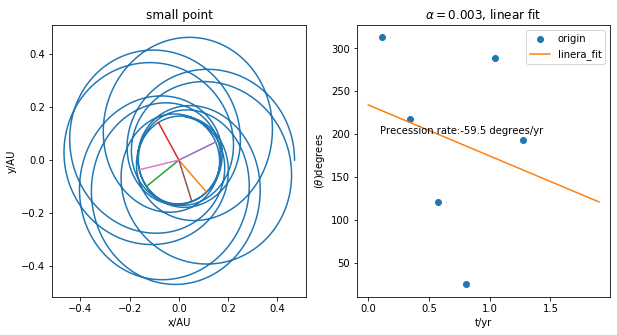

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 26 14:56:44 2016
@author: Administrator
"""

import numpy as np
import matplotlib.pyplot as plt
from math import pi, atan

class Orbit(object):
    def __init__(self, r=1.0, beta=2.00, b=1.0, al=0.01):
        self.b = b
        self.vxl=[0]
        self.vyl=[b*2*pi/r**0.5]
        self.xl=[r]
        self.yl=[0]
        self.tl=[0]
        
        self.a=r
        self.beta = beta
        self.al = al
        
    def iterate(self, dt, prec=False):
        if prec == False:
            self.r = (self.x**2+self.y**2)**0.5
            self.vx = self.vx - 4*pi**2*self.x/self.r**(1+self.beta)*dt
            self.vy = self.vy - 4*pi**2*self.y/self.r**(1+self.beta)*dt
            self.x = self.x + self.vx*dt
            self.y = self.y + self.vy*dt
            self.t = self.t + dt
        else:
            self.r = (self.x**2+self.y**2)**0.5
            self.vx = self.vx - 4*pi**2*self.x/self.r**3*(1+self.al/self.r**2)*dt
            self.vy = self.vy - 4*pi**2*self.y/self.r**3*(1+self.al/self.r**2)*dt
            self.x = self.x + self.vx*dt
            self.y = self.y + self.vy*dt
            self.t = self.t + dt
      
    def calculate(self, dt=0.0001, step=10000, pre=False):
        if pre == True:
            self.vyl=[8.2]
            self.xl = [0.47]
            self.rl = [0.47]
            self.tll = []
            self.xll = []
            self.yll = []
        self.vx=self.vxl[0]
        self.vy=self.vyl[0]
        self.x=self.xl[0]
        self.y=self.yl[0]
        self.tl2 = []
        self.t=0
        self.t1=0
        for i in range(step):
            self.iterate(dt, prec=pre)
            self.xl.append(self.x)
            self.yl.append(self.y)
            self.tl.append(self.t)
            if  0 <self.x < 0.01 and self.y>0 :
                    self.tl2.append(self.t-self.t1)
                    self.t1=self.t
            if pre == True:
                self.rl.append(self.r)
                try:
                    if (self.rl[-2] < self.rl[-1]) and (self.rl[-2] < self.rl[-3]):
                        self.xll.append(self.xl[-2])
                        self.yll.append(self.yl[-2])
                        self.tll.append(self.tl[-2])
                except IndexError:
                    continue
                
                        
    def kepler(self):
        if not (self.b == 1.0):
            self.a = max((max(self.xl)-min(self.xl))/2,(max(self.yl)-min(self.yl))/2)
        tl2 = np.array(self.tl2[3:])
        T=np.mean(tl2[np.where(tl2 > 0.1)])
        return (T, T**2/(self.a)**3)
    
    def prece(self):
        self.thel = []
        for x, y in zip(self.xll, self.yll):
            if x > 0 and y > 0:
                the = atan(y/x)*180/pi
                
            elif x > 0 and y < 0:
                the = (2*pi + atan(y/x))*180/pi
                
            else:
                the = (pi+atan(y/x))*180/pi
            
            self.thel.append(the)
        
    def reset(self, r=1.0, beta=2.0, b=1.0, al=0.01):
        self.al = al
        self.b = b
        self.vxl=[0]
        self.vyl=[b*2*pi/r**0.5]
        self.xl=[r]
        self.yl=[0]
        self.tl=[0]
        self.a=r
        self.beta = beta
 
data = {0.72: "Venus", 1.00: "Earth", 1.52: "Mars", 5.20: "Jupiter", 9.54: "Saturn", 0.39:"Mercury"}


def kepler():     
    a = Orbit()
    for r0 in data.keys():
        a.reset(r=r0, b=1.2)
        a.calculate(dt = 0.001, step = 100000)
        T, k = a.kepler()
        print ("%s: T= %.2f year, k=%.4f" %(data[r0], T, k))
        plt.plot(a.xl, a.yl, label="%s" %data[r0])
    
        
    plt.xlabel("x(Au)")
    plt.ylabel('y(Au)')
    plt.title("Planets' orbit:elliptical ")
    ax = plt.gca()
    ax.set_aspect(1)
  
    plt.legend(loc=2, bbox_to_anchor=(1,1), )

def bete():
    a = Orbit()
    bl = [1.0,  1.1, 1.2, 0.8, 0.6, 1.5]
    fig = plt.figure(figsize=(15,8))
    for i in range(6):
         fig.add_subplot(230+i+1)
    for i in range(len(bl)): 
        a.reset(beta=2.05, b=bl[i])
        a.calculate(dt = 0.001, step = 10000)
        ax = fig.axes[i]
        ax.plot(a.xl, a.yl)
        ax.set_aspect(1)
        ax.set_title("Initial v=%.1fv0" %bl[i])
        ax.set_xlabel('x(Au)')
        ax.set_ylabel('y(Au)')
    plt.tight_layout()
def perce():      
    c = Orbit(al=0.03)
    c.calculate(step = 15000, pre=True)
    c.prece()
    rate, y0 = np.polyfit(c.tll, c.thel, 1)
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(c.xl, c.yl)
    for x, y in zip(c.xll, c.yll):
        ax1.plot([0, x], [0, y])
        
    ax2.plot(c.tll, c.thel, 'o', label=u'origin')
    t = np.arange(0, 2, 0.1)
    ax2.plot(t, rate*t+y0, label=u"linera_fit")
    ax1.set_title(u'small point')
    ax2.set_title(r"$\alpha=0.003$, linear fit")
    ax2.text(0.1, 200, u"Precession rate:%.1f degrees/yr" %rate )
    ax2.set_xlabel("t/yr")
    ax2.set_ylabel(r"$(\theta)$degrees")
    ax1.set_xlabel('x/AU')
    ax1.set_ylabel('y/AU')
    ax2.legend()

def pperce():
    ratel = []     
    b = Orbit()  
    al0l = [0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.002, 0.003]
    for al0 in al0l:
        b.reset(al=al0)
        b.calculate(step = 30000, pre=True)
        b.prece()
        rate, y0 = np.polyfit(b.tll, b.thel, 1)
        ratel.append(rate)
    
    C, y0 = np.polyfit(al0l, ratel, 1)
    
    plt.plot(al0l, ratel, 'o', label=u'原始数据')
    a = np.arange(0, 0.004, 0.000001)
    plt.plot(a, C*a+y0, label=u"拟合曲线")
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$d\theta/dt(degrees/yr)$")
    plt.legend()
    prea = 1.1e-8
    prerate = C*prea*360000
    plt.text(0.0003, 40, "Precession rate: %.2farcsec/100yr" %prerate)


if __name__ == "__main__":
    perce()

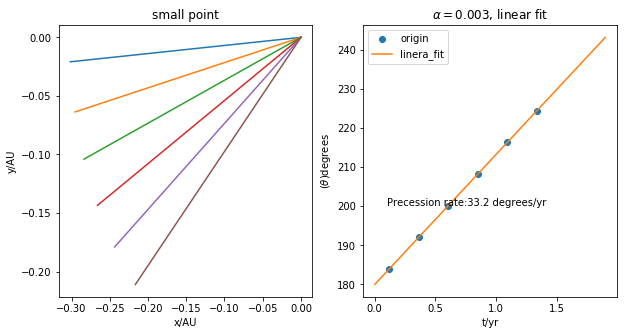

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 26 14:56:44 2016
@author: Administrator
"""

import numpy as np
import matplotlib.pyplot as plt
from math import pi, atan

class Orbit(object):
    def __init__(self, r=1.0, beta=2.00, b=1.0, al=0.01):
        self.b = b
        self.vxl=[0]
        self.vyl=[b*2*pi/r**0.5]
        self.xl=[r]
        self.yl=[0]
        self.tl=[0]
        
        self.a=r
        self.beta = beta
        self.al = al
        
    def iterate(self, dt, prec=False):
        if prec == False:
            self.r = (self.x**2+self.y**2)**0.5
            self.vx = self.vx - 4*pi**2*self.x/self.r**(1+self.beta)*dt
            self.vy = self.vy - 4*pi**2*self.y/self.r**(1+self.beta)*dt
            self.x = self.x + self.vx*dt
            self.y = self.y + self.vy*dt
            self.t = self.t + dt
        else:
            self.r = (self.x**2+self.y**2)**0.5
            self.vx = self.vx - 4*pi**2*self.x/self.r**3*(1+self.al/self.r**2)*dt
            self.vy = self.vy - 4*pi**2*self.y/self.r**3*(1+self.al/self.r**2)*dt
            self.x = self.x + self.vx*dt
            self.y = self.y + self.vy*dt
            self.t = self.t + dt
      
    def calculate(self, dt=0.0001, step=10000, pre=False):
        if pre == True:
            self.vyl=[8.2]
            self.xl = [0.47]
            self.rl = [0.47]
            self.tll = []
            self.xll = []
            self.yll = []
        self.vx=self.vxl[0]
        self.vy=self.vyl[0]
        self.x=self.xl[0]
        self.y=self.yl[0]
        self.tl2 = []
        self.t=0
        self.t1=0
        for i in range(step):
            self.iterate(dt, prec=pre)
            self.xl.append(self.x)
            self.yl.append(self.y)
            self.tl.append(self.t)
            if  0 <self.x < 0.01 and self.y>0 :
                    self.tl2.append(self.t-self.t1)
                    self.t1=self.t
            if pre == True:
                self.rl.append(self.r)
                try:
                    if (self.rl[-2] < self.rl[-1]) and (self.rl[-2] < self.rl[-3]):
                        self.xll.append(self.xl[-2])
                        self.yll.append(self.yl[-2])
                        self.tll.append(self.tl[-2])
                except IndexError:
                    continue
                
                        
    def kepler(self):
        if not (self.b == 1.0):
            self.a = max((max(self.xl)-min(self.xl))/2,(max(self.yl)-min(self.yl))/2)
        tl2 = np.array(self.tl2[3:])
        T=np.mean(tl2[np.where(tl2 > 0.1)])
        return (T, T**2/(self.a)**3)
    
    def prece(self):
        self.thel = []
        for x, y in zip(self.xll, self.yll):
            if x > 0 and y > 0:
                the = atan(y/x)*180/pi
                
            elif x > 0 and y < 0:
                the = (2*pi + atan(y/x))*180/pi
                
            else:
                the = (pi+atan(y/x))*180/pi
            
            self.thel.append(the)
        
    def reset(self, r=1.0, beta=2.0, b=1.0, al=0.01):
        self.al = al
        self.b = b
        self.vxl=[0]
        self.vyl=[b*2*pi/r**0.5]
        self.xl=[r]
        self.yl=[0]
        self.tl=[0]
        self.a=r
        self.beta = beta
 
data = {0.72: "Venus", 1.00: "Earth", 1.52: "Mars", 5.20: "Jupiter", 9.54: "Saturn", 0.39:"Mercury"}


def kepler():     
    a = Orbit()
    for r0 in data.keys():
        a.reset(r=r0, b=1.2)
        a.calculate(dt = 0.001, step = 100000)
        T, k = a.kepler()
        print ("%s: T= %.2f year, k=%.4f" %(data[r0], T, k))
        plt.plot(a.xl, a.yl, label="%s" %data[r0])
    
        
    plt.xlabel("x(Au)")
    plt.ylabel('y(Au)')
    plt.title("Planets' orbit:elliptical ")
    ax = plt.gca()
    ax.set_aspect(1)
  
    plt.legend(loc=2, bbox_to_anchor=(1,1), )

def bete():
    a = Orbit()
    bl = [1.0,  1.1, 1.2, 0.8, 0.6, 1.5]
    fig = plt.figure(figsize=(15,8))
    for i in range(6):
         fig.add_subplot(230+i+1)
    for i in range(len(bl)): 
        a.reset(beta=2.05, b=bl[i])
        a.calculate(dt = 0.001, step = 10000)
        ax = fig.axes[i]
        ax.plot(a.xl, a.yl)
        ax.set_aspect(1)
        ax.set_title("Initial v=%.1fv0" %bl[i])
        ax.set_xlabel('x(Au)')
        ax.set_ylabel('y(Au)')
    plt.tight_layout()
def perce():      
    c = Orbit(al=0.003)
    c.calculate(step = 15000, pre=True)
    c.prece()
    rate, y0 = np.polyfit(c.tll, c.thel, 1)
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(c.xl, c.yl)
    for x, y in zip(c.xll, c.yll):
        ax1.plot([0, x], [0, y])
        
    ax2.plot(c.tll, c.thel, 'o', label=u'origin')
    t = np.arange(0, 2, 0.1)
    ax2.plot(t, rate*t+y0, label=u"linera_fit")
    ax1.set_title(u'small point')
    ax2.set_title(r"$\alpha=0.003$, linear fit")
    ax2.text(0.1, 200, u"Precession rate:%.1f degrees/yr" %rate )
    ax2.set_xlabel("t/yr")
    ax2.set_ylabel(r"$(\theta)$degrees")
    ax1.set_xlabel('x/AU')
    ax1.set_ylabel('y/AU')
    ax2.legend()

def pperce():
    ratel = []     
    b = Orbit()  
    al0l = [0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.002, 0.003]
    for al0 in al0l:
        b.reset(al=al0)
        b.calculate(step = 30000, pre=True)
        b.prece()
        rate, y0 = np.polyfit(b.tll, b.thel, 1)
        ratel.append(rate)
    
    C, y0 = np.polyfit(al0l, ratel, 1)
    
    plt.plot(al0l, ratel, 'o', label=u'原始数据')
    a = np.arange(0, 0.004, 0.000001)
    plt.plot(a, C*a+y0, label=u"拟合曲线")
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$d\theta/dt(degrees/yr)$")
    plt.legend()
    prea = 1.1e-8
    prerate = C*prea*360000
    plt.text(0.0003, 40, "Precession rate: %.2farcsec/100yr" %prerate)


if __name__ == "__main__":
    perce()